In [1]:
# Before starting to use the notebook, run:
# !pip install astropy pandas

In [2]:
from io import StringIO
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

## Load remote public data
First 10 files from StarHorse DB  
See also: https://data.aip.de/projects/starhorse2021.html

In [4]:
filelist = []
for n in range(10):
    remote_data = f"https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-00000{str(n)}.fits.hdf5.txt"
    filelist.append(remote_data)

In [5]:
filelist

['https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000000.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000001.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000002.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000003.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000004.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000005.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000006.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000007.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000008.fits.hdf5.txt',
 'https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000009.fits.hdf5.txt']

In [6]:
# Create big pandas dataframe
df_list = [pd.read_csv(StringIO(requests.get(file).content.decode('utf-8')),delimiter="\s+",
          dtype={'#ID': 'int64'}).rename(columns={"#ID": "ID"}) for file in filelist]
dfsh = pd.concat(df_list)

In [7]:
dfsh

,ID,glon,glat,age05,age16,age50,age84,age95,mass16,mass50,...,dist16,dist50,dist84,dist95,AV05,AV16,AV50,AV84,AV95,nummodels
0,2179527509948472960,99.732330,5.539836,1.584893,1.584893,1.918129,3.028304,6.309719,1.405347,1.669525,...,1.805308,2.268470,2.580245,2.781437,2.651722,2.947731,3.774186,3.793800,3.975703,40
1,4552763568253193216,45.908016,21.590012,1.260276,4.919705,9.978824,10.093483,10.130578,0.823519,0.949997,...,4.259008,5.794463,7.694989,7.776443,0.035201,0.040917,0.098448,0.266753,0.403617,110
2,6058641430801666176,298.187320,1.941470,6.548861,7.361946,9.875117,10.000230,10.000230,0.880000,0.882523,...,2.397162,2.407333,2.484209,2.509081,0.651637,0.767748,1.110594,1.149732,1.162394,9
3,6769825617731210240,13.211025,-17.069160,1.258925,3.162278,5.011988,6.309719,10.000230,0.500000,0.539000,...,0.778310,0.842801,0.947013,1.018814,0.424533,0.457668,0.505531,0.576823,0.582454,63
4,6129736303631533568,295.242650,12.475692,1.132043,3.313459,8.047072,10.093233,12.516225,0.753520,0.856543,...,2.777331,3.482605,7.042533,8.000782,0.073353,0.233843,0.441955,0.658852,0.826128,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,4143448550715852416,10.732629,2.557756,3.202500,4.400679,5.011988,8.733505,9.933854,1.047086,1.154797,...,5.365728,5.533154,5.585612,6.219615,3.288282,3.328292,3.407444,3.457738,3.726296,24
2103,4122345143001673216,5.060803,9.953367,10.000230,12.589544,12.589544,12.589544,12.589544,0.847000,0.854635,...,2.082904,2.331204,2.486545,2.538350,1.567138,1.608084,1.787776,1.821966,2.106109,41
2104,5597320062994039424,246.476120,0.324409,1.697497,8.131003,9.777963,10.000230,10.000230,0.808858,0.825343,...,1.998115,1.999770,2.006787,2.738298,0.296994,0.329562,0.418981,0.461652,1.001390,35
2105,4512173279753990656,48.224262,9.670657,0.186881,3.935716,5.077215,7.977753,8.088695,0.965620,1.138943,...,1.940025,2.239760,2.262155,2.431696,0.562968,0.691482,0.710735,0.929910,1.008351,105


In [8]:
dfsh.columns

Index(['ID', 'glon', 'glat', 'age05', 'age16', 'age50', 'age84', 'age95',
       'mass16', 'mass50', 'mass84', 'teff16', 'teff50', 'teff84', 'logg16',
       'logg50', 'logg84', 'met16', 'met50', 'met84', 'dist05', 'dist16',
       'dist50', 'dist84', 'dist95', 'AV05', 'AV16', 'AV50', 'AV84', 'AV95',
       'nummodels'],
      dtype='object')

In [9]:
# Read coordinate columns in astropy framework
coords = SkyCoord(l=dfsh.glon.values, b=dfsh.glat.values, unit='degree', frame='galactic')

## Make a galactic plot in aitoff projection

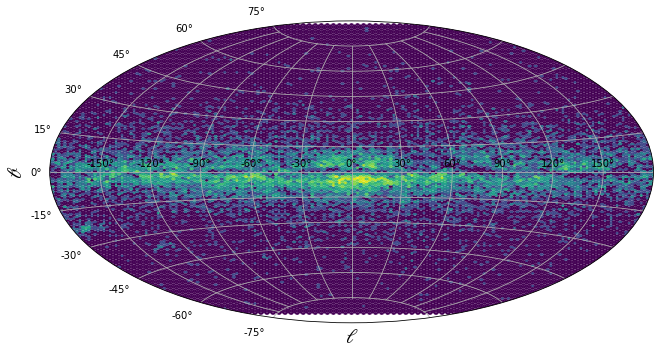

In [10]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='aitoff')

l = coords.l.wrap_at(180*u.deg).radian
b = coords.b.radian

ax.hexbin(l, b, cmap=plt.cm.viridis, bins='log', gridsize = 200, mincnt=0)
# ax.plot(l, b, 'o', markersize=3, alpha=0.7)

ax.set_xlabel('$\mathscr{l}$', fontsize=20)
ax.set_ylabel('$\mathscr{b}$', fontsize=20)
ax.grid(True)

fig.tight_layout()
plt.savefig(output_file, format='png', dpi=150)